<b>Pratiksha Bhaskar Acharya</b>
<br>
<b>Net ID: pxa230021

## Customer Churn Prediction 

<br>

### Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtickimport 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.combine import SMOTEENN
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint

### Loading the raw dataset

In [2]:
raw_data = pd.read_csv("Customer_churn_data.csv")

<b>Reading the first 10 records in the raw data to understand the dataset

In [3]:
raw_data.head(10)

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   
5  4190-MFLUW      1  United States  California  Los Angeles     90020   
6  8779-QRDMV      1  United States  California  Los Angeles     90022   
7  1066-JKSGK      1  United States  California  Los Angeles     90024   
8  6467-CHFZW      1  United States  California  Los Angeles     90028   
9  8665-UTDHZ      1  United States  California  Los Angeles     90029   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   
5  34.066367, -118.309868  34.066367 -118.309868  Female  ...  Month-to-month   
6   34.02381, -118.156582  34.023810 -118.156582    Male  ...  Month-to-month   
7  34.066303, -118.435479  34.066303 -118.435479    Male  ...  Month-to-month   
8  34.099869, -118.326843  34.099869 -118.326843    Male  ...  Month-to-month   
9  34.089953, -118.294824  34.089953 -118.294824    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   
5                No    Credit card (automatic)            55.20        528.35   
6               Yes           Electronic check            39.65         39.65   
7                No               Mailed check            20.15         20.15   
8               Yes           Electronic check            99.35       4749.15   
9                No           Electronic check            30.20          30.2   

  Churn Label Churn Value Churn Score  CLTV  \
0         Yes           1          86  3239   
1         Yes           1          67  2701   
2         Yes           1          86  5372   
3         Yes           1          84  5003   
4         Yes           1          89  5340   
5         Yes           1          78  5925   
6         Yes           1         100  5433   
7         Yes           1          92  4832   
8         Yes           1          77  5789   
9         Yes           1          97  2915   

                                Churn Reason  
0               Competitor made better offer  
1                                      Moved  
2                                      Moved  
3                                      Moved  
4              Competitor had better devices  
5  Competitor offered higher download speeds  
6               Competitor offered more data  
7               Competitor made better offer  
8              Competitor had better devices  
9              Competitor had better devices  

[10 rows x 33 columns]

<b>The dataset comprises the following information <br /></b>
Customer ID : CustomerID  <br />
Geographic information : Country,State, City, Zip Code, Lat Long, Latitude, Longitude  <br />
Demographic information : Gender, Senior Citizen, Partner, Dependents  <br />
Customer account/billing informtion: Tenure months, Contract, Paperless Billing, Payment Method, Monthly Charges, Total Charges <br />
Services that each customer has subscribed to : Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV and Movies  <br />
Information about Customers leaving : Churn Label, Churn Value , Churn Score, CLTV, Churn Reason

### Data Manipulation

<b>Dropping columns <br>
We will drop few of the columns as they are not having any impact on churning of the customers. All the customers in the dataset are from California state.

In [4]:
raw_data.drop(columns= ['CustomerID','Count','Country','State','City','Zip Code','Lat Long','Latitude','Longitude','Churn Value','Churn Score','CLTV','Churn Reason'], axis=1, inplace=True)
raw_data.head()

Gender Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0    Male             No      No         No              2           Yes   
1  Female             No      No        Yes              2           Yes   
2  Female             No      No        Yes              8           Yes   
3  Female             No     Yes        Yes             28           Yes   
4    Male             No      No        Yes             49           Yes   

  Multiple Lines Internet Service Online Security Online Backup  \
0             No              DSL             Yes           Yes   
1             No      Fiber optic              No            No   
2            Yes      Fiber optic              No            No   
3            Yes      Fiber optic              No            No   
4            Yes      Fiber optic              No           Yes   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No               No   
1                No           No           No               No   
2               Yes           No          Yes              Yes   
3               Yes          Yes          Yes              Yes   
4               Yes           No          Yes              Yes   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes               Mailed check   
1  Month-to-month               Yes           Electronic check   
2  Month-to-month               Yes           Electronic check   
3  Month-to-month               Yes           Electronic check   
4  Month-to-month               Yes  Bank transfer (automatic)   

   Monthly Charges Total Charges Churn Label  
0            53.85        108.15         Yes  
1            70.70        151.65         Yes  
2            99.65         820.5         Yes  
3           104.80       3046.05         Yes  
4           103.70        5036.3         Yes

<b>Renaming the columns

In [5]:
raw_data.rename(columns={'Senior Citizen': 'SeniorCitizen', 'Tenure Months': 'Tenure', 'Senior Citizen': 'SeniorCitizen','Phone Service':'PhoneService','Multiple Lines':'MultipleLines','Internet Service':'InternetService','Online Security':'OnlineSecurity','Online Backup':'OnlineBackup','Device Protection':'DeviceProtection', 'Tech Support':'TechSupport','Streaming TV':'StreamingTV','Streaming Movies':'StreamingMovies','Paperless Billing':'PaperlessBilling','Payment Method':'PaymentMethod','Monthly Charges':'MonthlyCharges','Total Charges':'TotalCharges','Churn Label':'Churn' }, inplace=True)

<b>Getting the information about the dataset

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<b>We can see that the data type of the Total Charges is not numeric, so we will convert its datatype to numeric

In [7]:
raw_data.TotalCharges= pd.to_numeric(raw_data.TotalCharges, errors='coerce')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<b>Checking for missing values 

In [8]:
raw_data.isnull().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<b>We can see that there are 11 records with null total charges , so we will drop these 11 records from the data set

In [9]:
raw_data.dropna(how = 'any', inplace = True)
raw_data.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<b>Copying the raw_data into processed_data

In [10]:
processed_data = raw_data.copy()

<b>Checking the transformed data 

In [11]:
processed_data

Gender SeniorCitizen Partner Dependents  Tenure PhoneService  \
0       Male            No      No         No       2          Yes   
1     Female            No      No        Yes       2          Yes   
2     Female            No      No        Yes       8          Yes   
3     Female            No     Yes        Yes      28          Yes   
4       Male            No      No        Yes      49          Yes   
...      ...           ...     ...        ...     ...          ...   
7038  Female            No      No         No      72          Yes   
7039    Male            No     Yes        Yes      24          Yes   
7040  Female            No     Yes        Yes      72          Yes   
7041  Female            No     Yes        Yes      11           No   
7042    Male            No      No         No      66          Yes   

         MultipleLines InternetService       OnlineSecurity  \
0                   No             DSL                  Yes   
1                   No     Fiber optic                   No   
2                  Yes     Fiber optic                   No   
3                  Yes     Fiber optic                   No   
4                  Yes     Fiber optic                   No   
...                ...             ...                  ...   
7038                No              No  No internet service   
7039               Yes             DSL                  Yes   
7040               Yes     Fiber optic                   No   
7041  No phone service             DSL                  Yes   
7042                No     Fiber optic                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
0                     Yes                   No                   No   
1                      No                   No                   No   
2                      No                  Yes                   No   
3                      No                  Yes                  Yes   
4                     Yes                  Yes                   No   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039                   No                  Yes                  Yes   
7040                  Yes                  Yes                   No   
7041                   No                   No                   No   
7042                   No                  Yes                  Yes   

              StreamingTV      StreamingMovies        Contract  \
0                      No                   No  Month-to-month   
1                      No                   No  Month-to-month   
2                     Yes                  Yes  Month-to-month   
3                     Yes                  Yes  Month-to-month   
4                     Yes                  Yes  Month-to-month   
...                   ...                  ...             ...   
7038  No internet service  No internet service        Two year   
7039                  Yes                  Yes        One year   
7040                  Yes                  Yes        One year   
7041                   No                   No  Month-to-month   
7042                  Yes                  Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes               Mailed check           53.85   
1                 Yes           Electronic check           70.70   
2                 Yes           Electronic check           99.65   
3                 Yes           Electronic check          104.80   
4                 Yes  Bank transfer (automatic)          103.70   
...               ...                        ...             ...   
7038              Yes  Bank transfer (automatic)           21.15   
7039              Yes               Mailed check           84.80   
7040              Yes    Credit card (automatic)          103.20   
7041              Yes           Electronic check           29.60   
7042          

### Data Visualization<br>
<b>Lets understand our target variable i.e. the Churn distribution

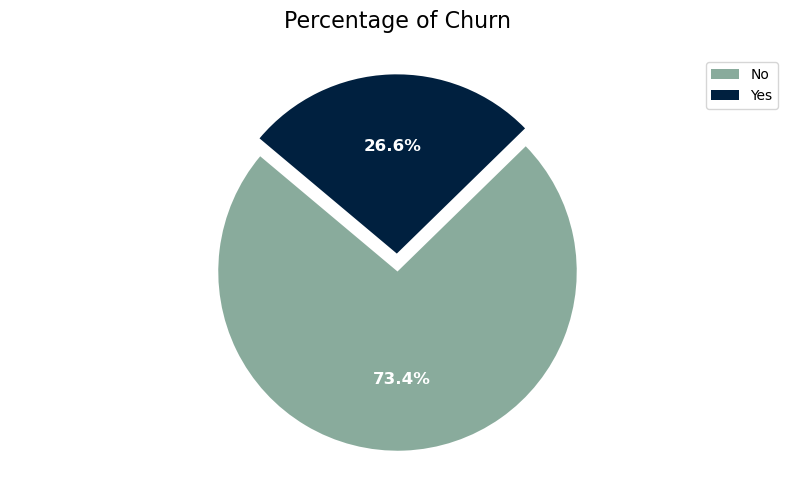

In [12]:

churn_percentage = processed_data['Churn'].value_counts(normalize=True) * 100

colors = ['#89ab9c', '#00203FFF']
explode = (0.1, 0)

plt.figure(figsize=(10, 6))
patches, texts, autotexts = plt.pie(churn_percentage, labels=churn_percentage.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode, textprops={'fontsize': 12, 'fontweight': 'bold', 'color':'white'})
plt.axis('equal')
plt.subplots_adjust(top=0.8)
plt.legend(labels=churn_percentage.index, loc='upper right')
plt.title('Percentage of Churn', fontsize=16, pad=20)

plt.show()

<b>In the dataset 26.6% of our data is about the Churned customers and 73.4% are the Non Churn customers<br> Let us understand how each of the features are affecting the target variable

Categorical features include : 
    "Gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
<br><br>
Numerical features include : "Tenure", "MonthlyCharges", "TotalCharges" <br><br>
target = "Churn"

<b>Lets understand the univariate analysis

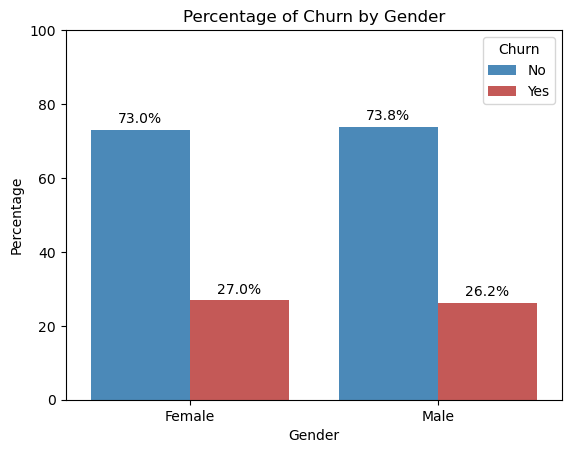

In [13]:

feature = 'Gender'


percentages = processed_data.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure()
custom_palette = ["#398CCA","#D64745"]  
sns.barplot(data=percentages, x=feature, y='percentage', hue='Churn', palette=custom_palette)
plt.title(f'Percentage of Churn by {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')
plt.ylim(0, 100)  


for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


<b>Insights:<br>
There is negligible difference in customer percentage who have churned. Both genders behaved in similar fashion when it comes to customer churn<br>



In [14]:
import plotly.express as px

custom_palette = {"No": '#398CCA', "Yes": '#D64745'}
fig = px.histogram(processed_data, x="SeniorCitizen", color="Churn", title="<b>Senior Citizen distribution Churn</b>", color_discrete_map=custom_palette)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



<b>Insights:<br>
The fraction of senior citizen is very less and most of the senior citizens churn.<br>

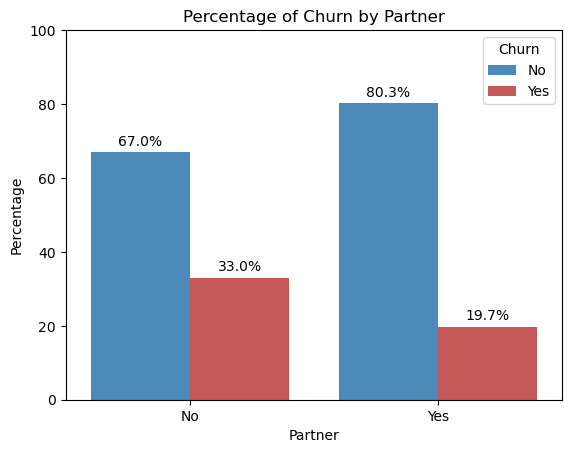

In [15]:

feature = 'Partner'


percentages = processed_data.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure()
custom_palette = ["#398CCA","#D64745"]  
sns.barplot(data=percentages, x=feature, y='percentage', hue='Churn', palette=custom_palette)
plt.title(f'Percentage of Churn by {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')
plt.ylim(0, 100) 

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


 <b>Insights:<br>
 Customers who don't have partners are more likely to churn

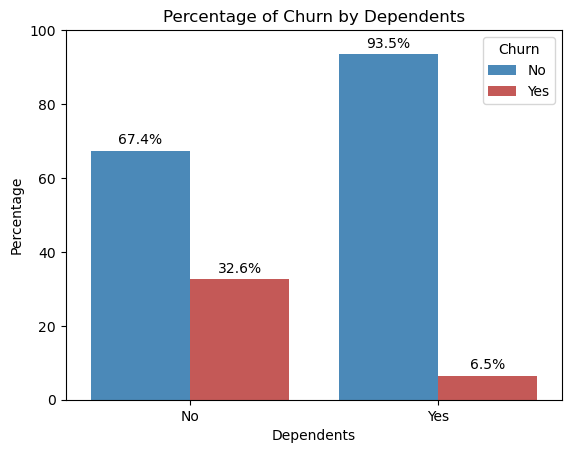

In [16]:

feature = 'Dependents'

percentages = processed_data.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure()
custom_palette = ["#398CCA","#D64745"]   
sns.barplot(data=percentages, x=feature, y='percentage', hue='Churn', palette=custom_palette)
plt.title(f'Percentage of Churn by {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')
plt.ylim(0, 100) 

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


 <b>Insights:<br>
 Customers without dependents are more likely to churn

In [17]:

custom_palette = {"No": "#398CCA", "Yes": "#D64745"} 
fig = px.histogram(processed_data, x="PhoneService", color="Churn", title="<b>Phone Service distribution by Churn</b>", color_discrete_map=custom_palette)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

<b>Insights:<br>
Very small fraction of customers don't have a phone service   and out of that, 1/3rd Customers are more likely to churn.

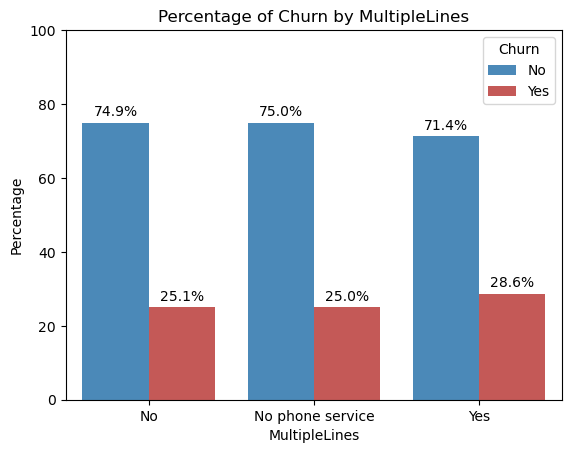

In [18]:

feature = 'MultipleLines'

percentages = processed_data.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure()
custom_palette = ["#398CCA","#D64745"]  
sns.barplot(data=percentages, x=feature, y='percentage', hue='Churn', palette=custom_palette)
plt.title(f'Percentage of Churn by {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')
plt.ylim(0, 100) 

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


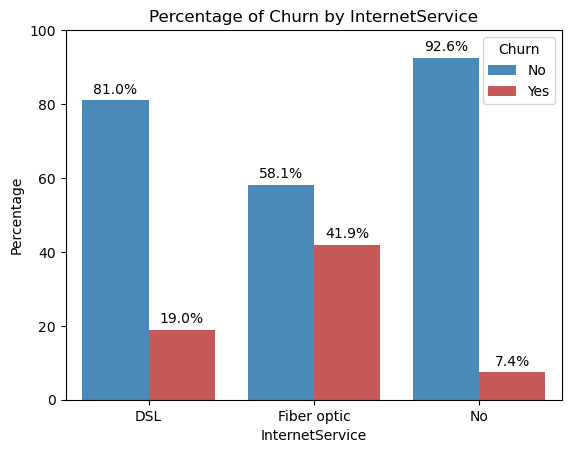

In [19]:

feature = 'InternetService'

percentages = processed_data.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure()
custom_palette = ["#398CCA","#D64745"]   
sns.barplot(data=percentages, x=feature, y='percentage', hue='Churn', palette=custom_palette)
plt.title(f'Percentage of Churn by {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')
plt.ylim(0, 100) 

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


<b> Insights:<br>
 Customers having Fiber optic internet service have more churn rate as compared to DSL <br>

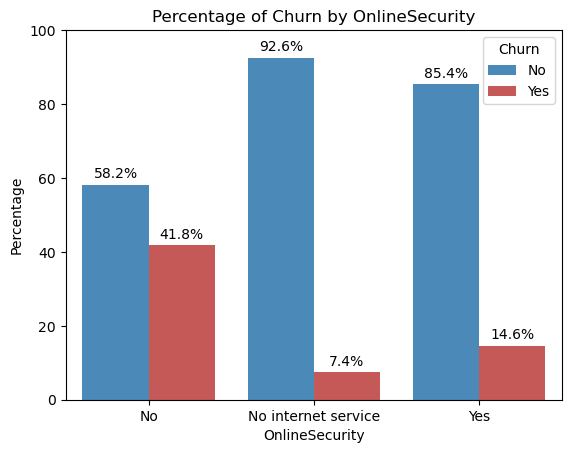

In [20]:

feature = 'OnlineSecurity'

percentages = processed_data.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure()
custom_palette = ["#398CCA","#D64745"]  
sns.barplot(data=percentages, x=feature, y='percentage', hue='Churn', palette=custom_palette)
plt.title(f'Percentage of Churn by {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')
plt.ylim(0, 100) 
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


 <b> Insights:<br>
  Most of the customers churn in the absence of online security

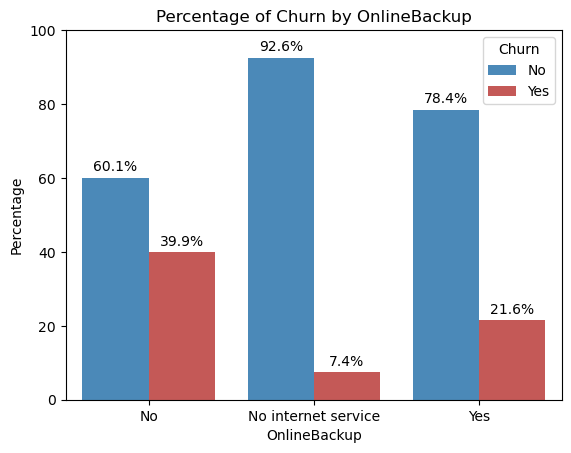

In [21]:

feature = 'OnlineBackup'

percentages = processed_data.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure()
custom_palette = ["#398CCA","#D64745"]  
sns.barplot(data=percentages, x=feature, y='percentage', hue='Churn', palette=custom_palette)
plt.title(f'Percentage of Churn by {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')
plt.ylim(0, 100) 

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


  <b>Insights:<br>
  The absence of online backup lead most of the customers to churn. 

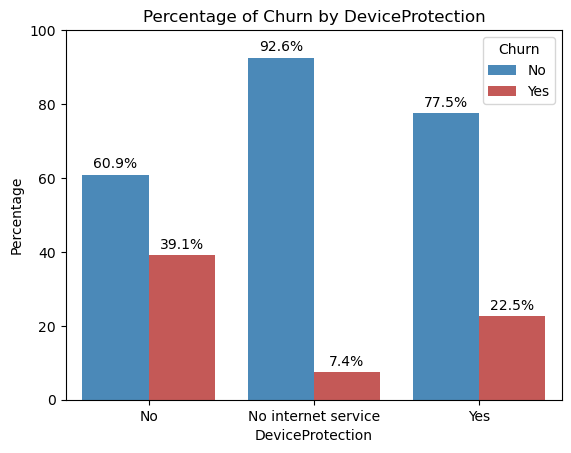

In [22]:

feature = 'DeviceProtection'

percentages = processed_data.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure()
custom_palette = ["#398CCA","#D64745"]  
sns.barplot(data=percentages, x=feature, y='percentage', hue='Churn', palette=custom_palette)
plt.title(f'Percentage of Churn by {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')
plt.ylim(0, 100)  

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


 <b>Insights:<br>
 Most of the customers churn in the absence of device protection

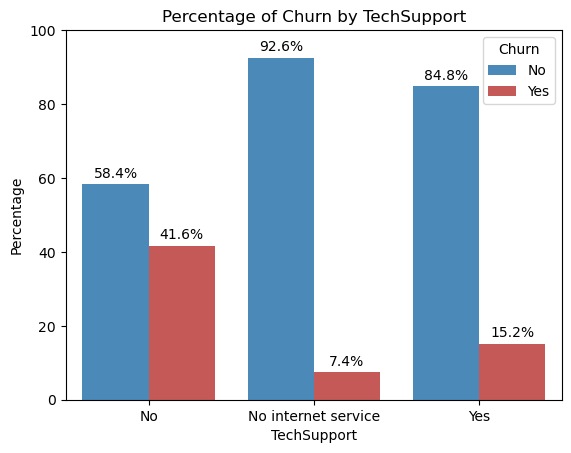

In [23]:

feature = 'TechSupport'

percentages = processed_data.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure()
custom_palette = ["#398CCA","#D64745"]   
sns.barplot(data=percentages, x=feature, y='percentage', hue='Churn', palette=custom_palette)
plt.title(f'Percentage of Churn by {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')
plt.ylim(0, 100)  

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


 <b>Insights:<br>
 The absence of tech support lead most of the customers to churn as compared to customer having tech support. 

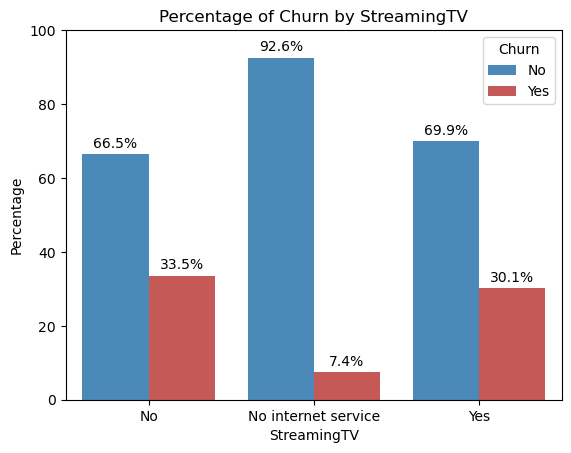

In [24]:

feature = 'StreamingTV'

percentages = processed_data.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure()
custom_palette = ["#398CCA","#D64745"]  
sns.barplot(data=percentages, x=feature, y='percentage', hue='Churn', palette=custom_palette)
plt.title(f'Percentage of Churn by {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')
plt.ylim(0, 100)  

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


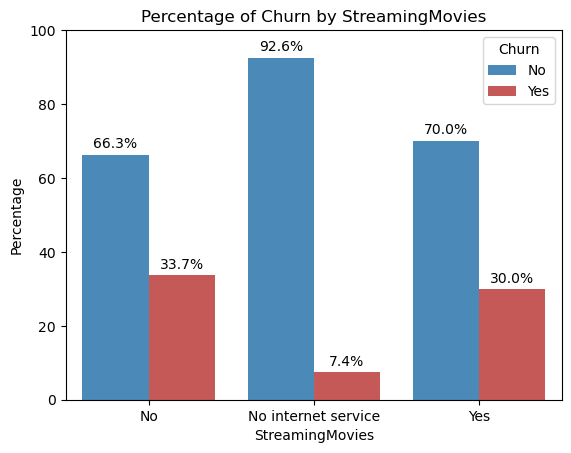

In [25]:

feature = 'StreamingMovies'

percentages = processed_data.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure()
custom_palette = ["#398CCA","#D64745"]  
sns.barplot(data=percentages, x=feature, y='percentage', hue='Churn', palette=custom_palette)
plt.title(f'Percentage of Churn by {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')
plt.ylim(0, 100) 

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


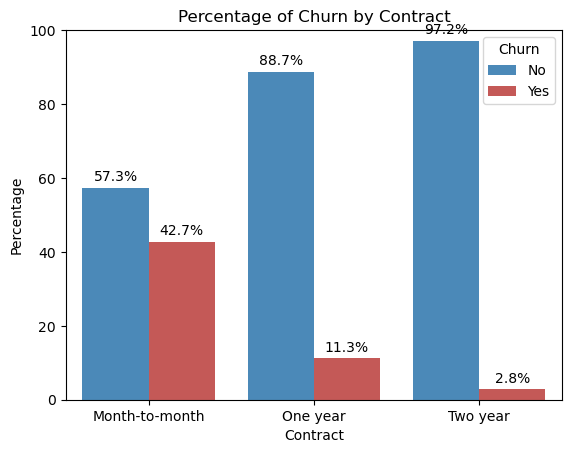

In [26]:

feature = 'Contract'


percentages = processed_data.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure()
custom_palette = ["#398CCA","#D64745"]  
sns.barplot(data=percentages, x=feature, y='percentage', hue='Churn', palette=custom_palette)
plt.title(f'Percentage of Churn by {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')
plt.ylim(0, 100)  

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


<b> Insights:<br>
 Customers with month-to-month contract have moved out more as compared to customers with one year or two year contract

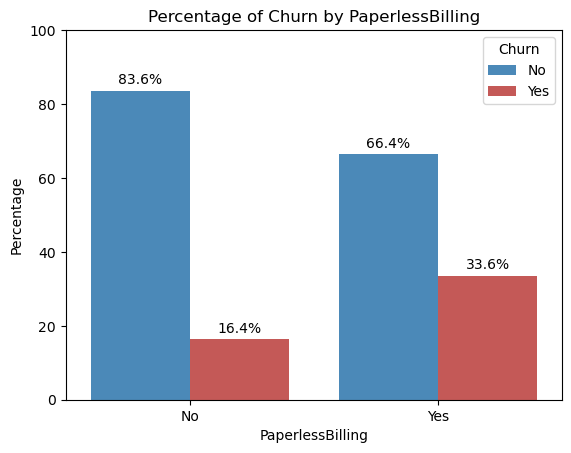

In [27]:

feature = 'PaperlessBilling'

percentages = processed_data.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure()
custom_palette = ["#398CCA","#D64745"]  
sns.barplot(data=percentages, x=feature, y='percentage', hue='Churn', palette=custom_palette)
plt.title(f'Percentage of Churn by {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')
plt.ylim(0, 100)  

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


 <b>Insights:<br>Customers with Paperless Billing are most likely to churn.

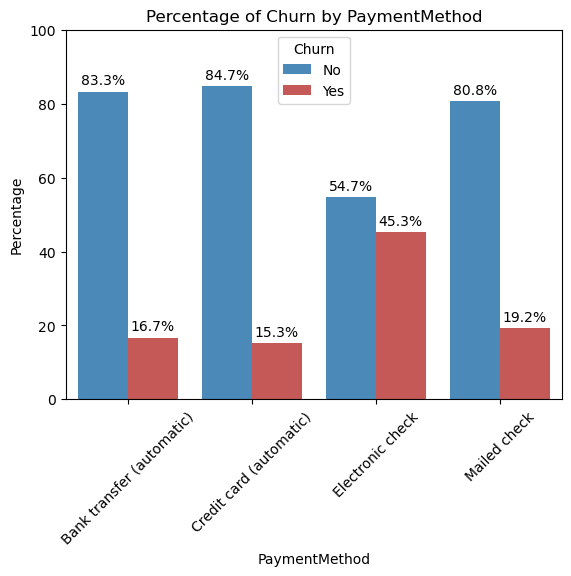

In [28]:

feature = 'PaymentMethod'

percentages = processed_data.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure()
custom_palette = ["#398CCA","#D64745"]  
sns.barplot(data=percentages, x=feature, y='percentage', hue='Churn', palette=custom_palette)
plt.title(f'Percentage of Churn by {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')
plt.ylim(0, 100)  
plt.xticks(rotation=45)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


<b>Insights:<br>
Major customers who moved out were having Electronic Check as Payment Method as compared to other payment method<br>


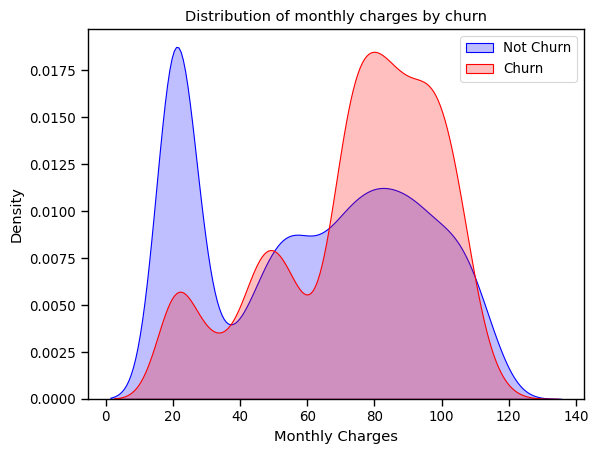

In [29]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(processed_data.MonthlyCharges[(raw_data["Churn"] == 'No') ],
                color="Blue", fill = True);
ax = sns.kdeplot(processed_data.MonthlyCharges[(raw_data["Churn"] == 'Yes') ],
                ax =ax, color="Red", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

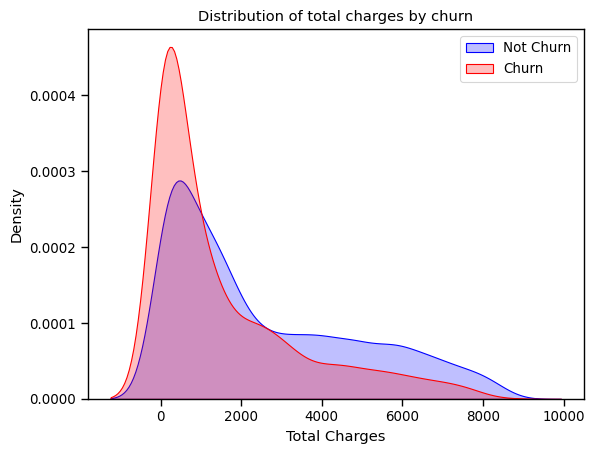

In [30]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(processed_data.TotalCharges[(raw_data["Churn"] == 'No') ],
                color="Blue", fill = True);
ax = sns.kdeplot(processed_data.TotalCharges[(raw_data["Churn"] == 'Yes') ],
                ax =ax, color="Red", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

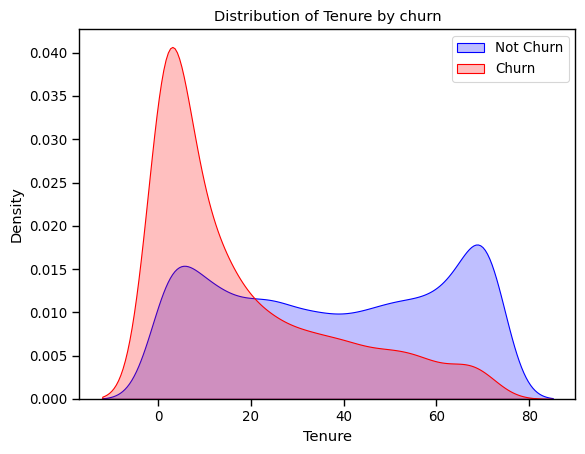

In [31]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(processed_data.Tenure[(raw_data["Churn"] == 'No') ],
                color="Blue", fill = True);
ax = sns.kdeplot(processed_data.Tenure[(raw_data["Churn"] == 'Yes') ],
                ax =ax, color="Red", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of Tenure by churn');

 <b>Insights:<br>
* <b>Customers with higher Monthly Charges are also more likely to churn<br>
* <b>New customers are more likely to churn



In [32]:
processed_data['Churn'] = processed_data['Churn'].replace({'Yes': 1, 'No': 0})


In [33]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


### PREDICTION MODEL FOR CUSTOMER CHURN

<b>We will build and evaluate the following five models to determine their accuracy:<br>

1.Logistic Regression<br>
2.Decision Tree Classifier<br>
3.Random Forest Classifier<br>
4.Support Vector Machine<br>
5.K-Nearest Neighbors<br>

This comparative analysis will allow us to assess their accuracies and identify the most suitable approach for predicting the customer churn <b>

In [34]:

label_encoders = {}
for column in processed_data.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    processed_data[column] = label_encoders[column].fit_transform(processed_data[column])

X = processed_data.drop('Churn', axis=1)
y = processed_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),

}

accuracies=[]
model_name=[]
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    model_name.append(name)
    accuracies.append(accuracy)
    print(f"{name}: Accuracy - {accuracy:.2f}")
    print()


Logistic Regression: Accuracy - 0.81

Decision Tree: Accuracy - 0.74

Random Forest: Accuracy - 0.79

Support Vector Machine: Accuracy - 0.81

K-Nearest Neighbors: Accuracy - 0.76



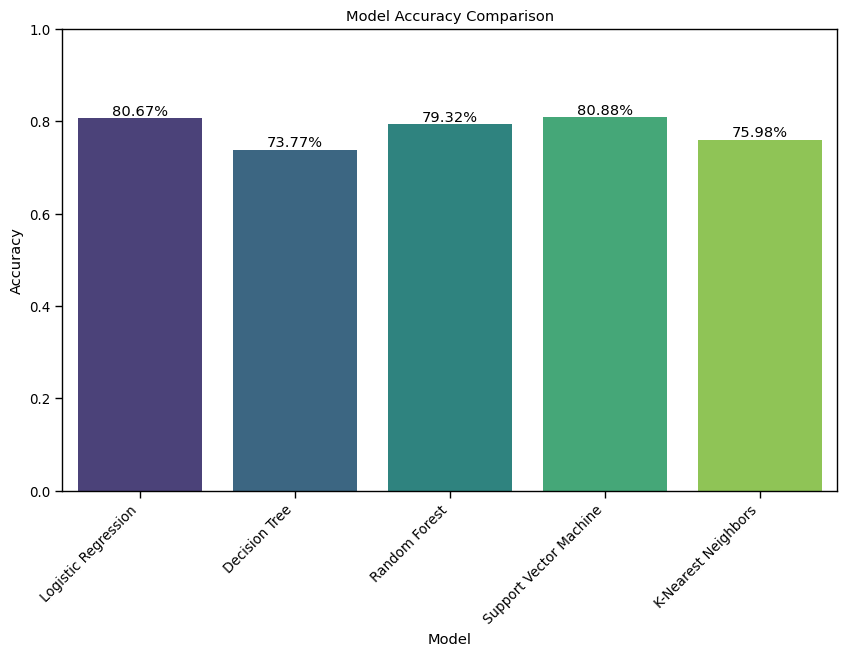

In [35]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=model_name, y=accuracies, palette="viridis")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

for i in range(len(model_name)):
    barplot.text(i, accuracies[i], f'{accuracies[i]*100:.2f}%', ha='center', va='bottom')

plt.show()

<b>To increase the accuracy of the model , we have used smoteenn, which helps to balance the distribution, and grid search cross-validation to optimize the models performance

In [36]:

sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

model_scores = []

models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20]}),  
   
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 'auto']}),  
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced', solver='saga', max_iter=10000,penalty='l2'),
     {'C': [0.1, 1, 10]}),
      
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}), 
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10]})  
    
]

for name, model, param_grid in models:
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()), 
        ('model', model)
    ])

    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    pipeline.fit(Xr_train, yr_train)
    y_pred = pipeline.predict(Xr_test)
    accuracy = accuracy_score(yr_test, y_pred)
    model_scores.append({'Model': name, 'Accuracy': accuracy})   
    scores_df = pd.DataFrame(model_scores)
    print(f"{name}: Accuracy - {accuracy:.2f}")
    
    print()


Random Forest: Accuracy - 0.96

Support Vector Machine: Accuracy - 0.96

Logistic Regression: Accuracy - 0.90

K-Nearest Neighbors: Accuracy - 0.98

Decision Tree: Accuracy - 0.94



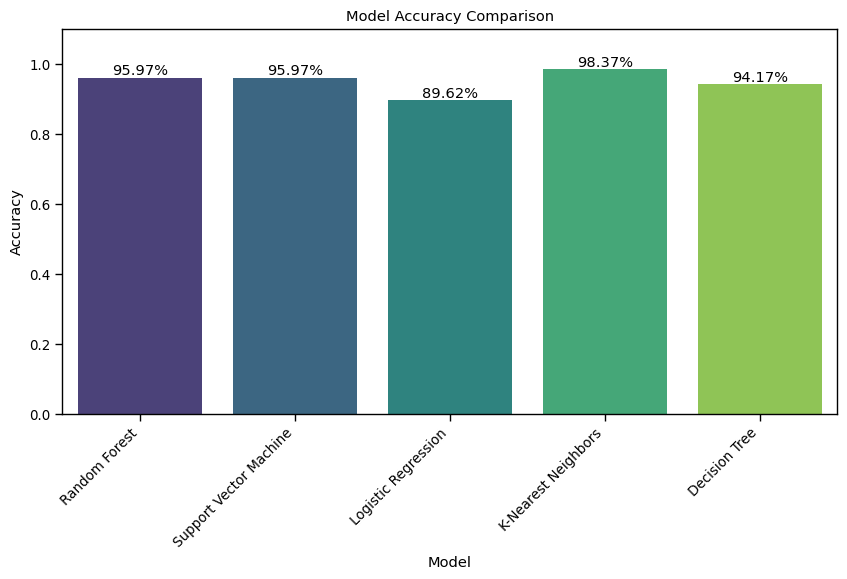

In [37]:

plt.figure(figsize=(10, 5))
barplot = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette="viridis")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)

for index, row in scores_df.iterrows():
    barplot.text(index, row['Accuracy'], f'{row["Accuracy"]*100:.2f}%', ha='center', va='bottom')

plt.show()

<b>Among the five models, we can see that the K-Nearest Neighbors has the highest accuracy of 98.37%